In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv(r"/content/drive/My Drive/Colab Notebooks/ppr/D3-Pamela/S3/Office_Pamela-S3.csv",index_col='timestamp')

In [4]:
train_data = df.iloc[:5760]
test_data = df.iloc[5760:]

In [5]:
len(train_data),len(test_data)

(5760, 720)

In [6]:
def load_data(data, seq_len):
    X = []
    y = []
    #print(len(data))
    for i in range(seq_len, len(data)):
        X.append(data.iloc[i-seq_len : i, 0])
        y.append(data.iloc[i, 0])
        #print(y)
   
    
    return [X, y]

In [7]:
# Sequence of training data
seq_len = 24 #choose sequence length

X1, y1= load_data(train_data, seq_len)

In [8]:
#Sequence of testing data
seq_len = 24 #choose sequence length

X2, y2= load_data(test_data, seq_len)

In [9]:
X_train = X1      
y_train = y1
X_test = X2             
y_test = y2

In [10]:
# convert training and testing data to numpy array
X_train = np.array(X_train)
y_train = np.array(y_train)
  
X_test = np.array(X_test)
y_test = np.array(y_test)

# reshape data to input into 3 dimension
X_train = np.reshape(X_train, (X_train.shape[0], seq_len, 1))
X_test = np.reshape(X_test, (X_test.shape[0], seq_len, 1))

In [11]:
print('X_train.shape = ',X_train.shape)
print('y_train.shape = ',y_train.shape)
print('X_test.shape = ',X_test.shape)
print('y_test.shape = ',y_test.shape)

X_train.shape =  (5736, 24, 1)
y_train.shape =  (5736,)
X_test.shape =  (696, 24, 1)
y_test.shape =  (696,)


In [12]:
import tensorflow as tf
import sklearn.preprocessing
from tensorflow.keras.layers import Dense,LSTM
from tensorflow.keras.models import Sequential

In [13]:
# define model
model = Sequential()
model.add(LSTM(24, activation='tanh', return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(24, activation='tanh'))
model.add(Dense(1))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 24, 24)            2496      
                                                                 
 lstm_1 (LSTM)               (None, 24)                4704      
                                                                 
 dense (Dense)               (None, 1)                 25        
                                                                 
Total params: 7,225
Trainable params: 7,225
Non-trainable params: 0
_________________________________________________________________


In [14]:
model.compile(optimizer="adam",loss="MSE")
model.fit(X_train, y_train, epochs=300, batch_size=128)

Epoch 1/300
45/45 [==============================] - 5s 24ms/step - loss: 819.4431
Epoch 2/300
45/45 [==============================] - 1s 23ms/step - loss: 650.7673
Epoch 3/300
45/45 [==============================] - 1s 24ms/step - loss: 560.5176
Epoch 4/300
45/45 [==============================] - 1s 23ms/step - loss: 507.7842
Epoch 5/300
45/45 [==============================] - 1s 23ms/step - loss: 464.7488
Epoch 6/300
45/45 [==============================] - 1s 23ms/step - loss: 425.3878
Epoch 7/300
45/45 [==============================] - 1s 23ms/step - loss: 389.9003
Epoch 8/300
45/45 [==============================] - 1s 25ms/step - loss: 358.2868
Epoch 9/300
45/45 [==============================] - 1s 24ms/step - loss: 330.0523
Epoch 10/300
45/45 [==============================] - 1s 23ms/step - loss: 304.8330
Epoch 11/300
45/45 [==============================] - 1s 23ms/step - loss: 282.2698
Epoch 12/300
45/45 [==============================] - 1s 24ms/step - loss: 262.1579
E

In [15]:
train_prediction=model.predict(X_train)
test_prediction=model.predict(X_test)

In [16]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error

from math import sqrt

In [17]:
rmse_train = sqrt(mean_squared_error(y_train, train_prediction))
rmse_test = sqrt(mean_squared_error(y_test, test_prediction))

mae_train=mean_absolute_error(y_train, train_prediction)
mae_test=mean_absolute_error(y_test, test_prediction)

mape_train = mean_absolute_percentage_error(y_train, train_prediction)
mape_test = mean_absolute_percentage_error(y_test, test_prediction)

In [18]:
print('Root Mean Squared Error for Stacked LSTM Model for training is:',rmse_train)
print('Root Mean Squared Error for Stacked LSTM Model for testing is:',rmse_test)
print('Mean Absolute Error for Stacked LSTM Model for training is:',mae_train)
print('Mean Absolute Error for Stacked LSTM Model for testing is:',mae_test)
print('MAPE for Stacked Model for training is:',mape_train)
print('MAPE for Stacked Model for testing is:',mape_test)

Root Mean Squared Error for Stacked LSTM Model for training is: 2.198446465381751
Root Mean Squared Error for Stacked LSTM Model for testing is: 2.9043358871813085
Mean Absolute Error for Stacked LSTM Model for training is: 1.6828309240432795
Mean Absolute Error for Stacked LSTM Model for testing is: 1.995694422452256
MAPE for Stacked Model for training is: 0.06564125633683375
MAPE for Stacked Model for testing is: 0.08276295600519384


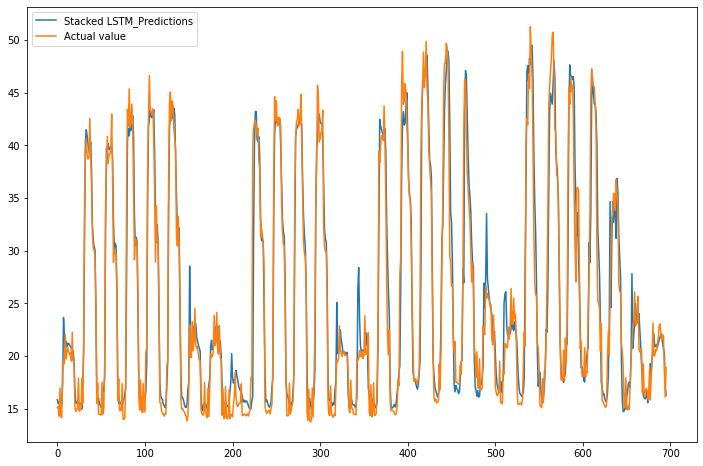

In [19]:
#pred=model.predict(X_test)
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (12,8)
plt.plot(test_prediction,label='Stacked LSTM_Predictions')
plt.plot(y_test,label='Actual value')
plt.legend(loc="upper left")
plt.show()

In [20]:
y_test=y_test.reshape(-1,1)

y_test[0],test_prediction[0]

(array([15.11666667]), array([15.87253], dtype=float32))

In [21]:
d1=[]
for i in range(len(y_test)):
    d1.append(y_test[i]-test_prediction[i])
    
print(d1)

[array([-0.75586331]), array([-0.25708046]), array([-1.37449271]), array([1.417976]), array([-1.51828969]), array([-1.31112022]), array([2.20165875]), array([-4.32086995]), array([-2.57454083]), array([1.29342155]), array([-1.69094684]), array([-0.42994983]), array([-0.43887126]), array([-0.79460818]), array([-0.9219799]), array([-0.52652448]), array([-1.15352008]), array([2.62551537]), array([-0.85819054]), array([0.02183787]), array([-1.68038864]), array([-0.76503551]), array([-0.62813606]), array([-0.79113808]), array([2.52045123]), array([-0.83066425]), array([-0.5421648]), array([-0.54729436]), array([2.92488568]), array([-1.76247952]), array([0.3973774]), array([3.11330185]), array([-1.21048635]), array([-0.88536301]), array([-1.83244807]), array([-1.40175323]), array([-0.66807454]), array([3.3358907]), array([-1.25085704]), array([-1.54330852]), array([-0.94279099]), array([-0.60517056]), array([-0.37859319]), array([-0.67587852]), array([1.26122208]), array([-0.91599617]), arra

In [22]:
d1.sort()
# Range of error value
max(d1),min(d1)

(array([23.8730999]), array([-12.68519287]))

In [24]:
neg=[]
pos=[]
for i in range(len(d1)):
  if(d1[i]<0):
    neg.append(d1[i])
  if(d1[i]>0):  
    pos.append(d1[i])

In [25]:
len(neg),len(pos)

(445, 251)